In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


#Importing the dataset
data = pd.read_csv("Iris.csv", index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
#Assigning independant and dependant varibles
X = data.iloc[:,[0,1,2,3]].values
y = np.unique(data.iloc[:,4], return_inverse=True)[1] #Converting classed to integers
X = X.reshape(-1, 4)


# Splitting train and test data 80% and 20% respectively    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)


Training data: (120, 4) (120,)
Test data: (30, 4) (30,)


In [4]:
# create an empty linear regression model like below and give it a good variable name
species_model = LinearRegression()

# to create the model, we use fit(x,y)
species_model.fit(X,y)


print('Intercept: \n', species_model.intercept_)
print('Coefficients: \n', species_model.coef_)


Intercept: 
 0.1920839948281392
Coefficients: 
 [-0.10974146 -0.04424045  0.22700138  0.60989412]


In [5]:
# Generate predictions
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
yerr = y_test-predictions
yerr.shape

(30,)

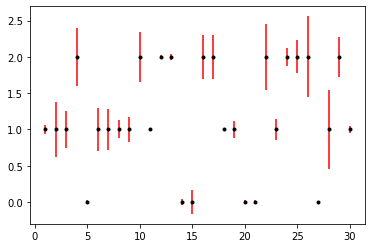

In [6]:
## Error plot of for the test set

plt.errorbar(range(1,31), y_test, yerr=(y_test-predictions), fmt='.k', ecolor="red");

In [7]:
print ("Score:", model.score(X_test, y_test))

Score: 0.8817462390298341


This score is quite close to 1, which suggests that our model fits our observations quite well.

# Compulsory Task 2

In [8]:
#Importing the dataset
wages = pd.read_csv("hourlywagedata.csv")
wages.head()

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338


## Cleaning

In [9]:
#Dropping records with string value " "

wages.drop(wages.index[wages['hourwage'] == " "], inplace=True)


In [10]:
# converting the hourly wage values to floats.
wages['hourwage'] = pd.to_numeric(wages['hourwage'])


# Exploration

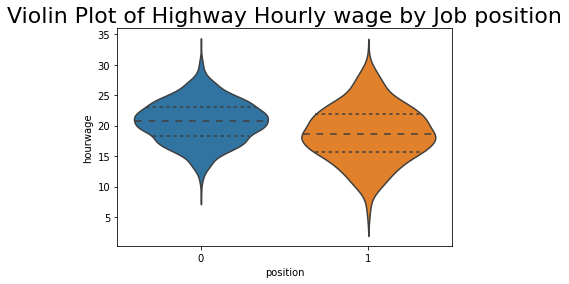

In [11]:
#Violin plot
sns.violinplot(x='position', y='hourwage', data=wages, scale='width', inner='quartile')
plt.title('Violin Plot of Highway Hourly wage by Job position', fontsize=22)
plt.show()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

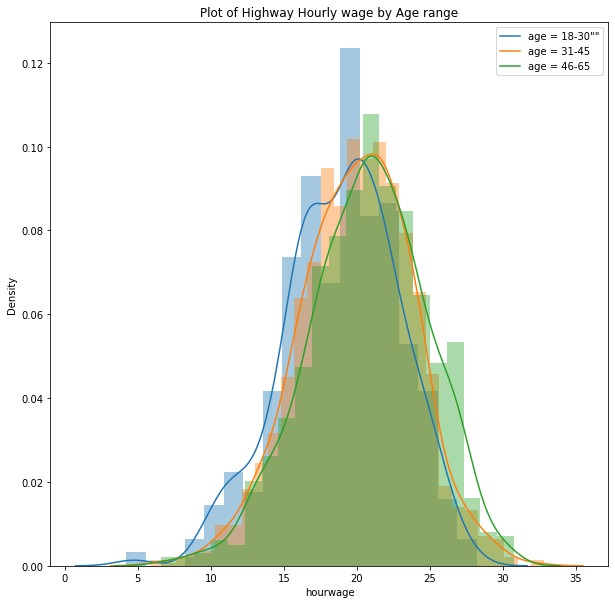

In [12]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(wages.loc[wages['agerange'] == 1]['hourwage'], kde_kws={'label': 'age = 18-30""'});
sns.distplot(wages.loc[wages['agerange'] == 2]['hourwage'], kde_kws={'label': 'age = 31-45'});
sns.distplot(wages.loc[wages['agerange'] == 3]['hourwage'], kde_kws={'label': 'age = 46-65'});

plt.title('Plot of Highway Hourly wage by Age range')
plt.legend()
plt.show()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

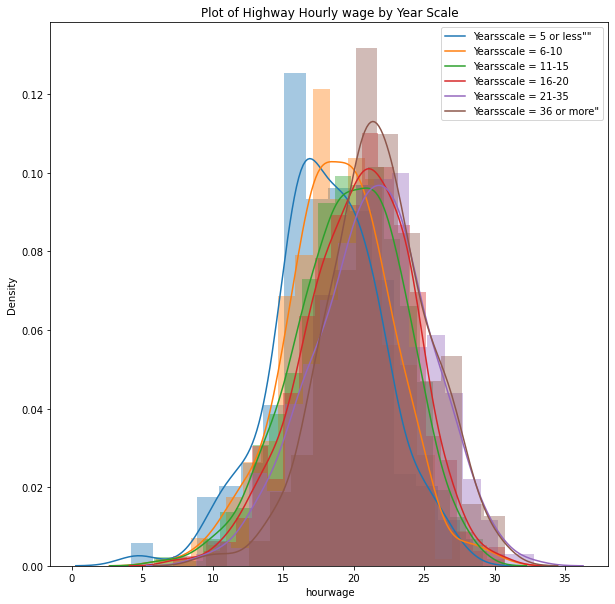

In [13]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(wages.loc[wages['yrsscale'] == 1]['hourwage'], kde_kws={'label': 'Yearsscale = 5 or less""'});
sns.distplot(wages.loc[wages['yrsscale'] == 2]['hourwage'], kde_kws={'label': 'Yearsscale = 6-10'});
sns.distplot(wages.loc[wages['yrsscale'] == 3]['hourwage'], kde_kws={'label': 'Yearsscale = 11-15'});
sns.distplot(wages.loc[wages['yrsscale'] == 4]['hourwage'], kde_kws={'label': 'Yearsscale = 16-20'});
sns.distplot(wages.loc[wages['yrsscale'] == 5]['hourwage'], kde_kws={'label': 'Yearsscale = 21-35'});
sns.distplot(wages.loc[wages['yrsscale'] == 6]['hourwage'], kde_kws={'label': 'Yearsscale = 36 or more"'})
plt.title('Plot of Highway Hourly wage by Year Scale')
plt.legend()
plt.show()

# Multiple Linear Regression

In [14]:
#Assigning variables
X = wages.iloc[:,[0,1,2]].values
y = wages.iloc[:,3].values
X = X.reshape(-1, 3)



In [15]:
# create an empty linear regression model like below and give it a good variable name
wage_model = LinearRegression()
# to create the model, we use fit(x,y)
wage_model.fit(X,y)
print('Intercept: \n', wage_model.intercept_)
print('Coefficients: \n', wage_model.coef_)


Intercept: 
 18.261630959472033
Coefficients: 
 [-2.0197037  -0.22575442  0.82398308]


# Training and test samples

In [16]:
#Generating training set and test set split with 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2328, 3) (2328,)
Test data: (583, 3) (583,)


Text(0.5, 1.0, 'Test data position distribution')

<Figure size 1080x360 with 0 Axes>

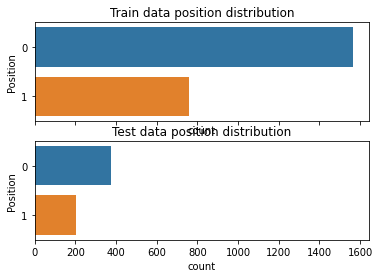

In [17]:
#Plotting distribution of variables om test and train set
train_set = pd.DataFrame({'Position': X_train[:, 0], 'Agerange': X_train[:, 1], 'Yrsscale': X_train[:, 2]})
test_set = pd.DataFrame({'Position': X_test[:, 0], 'Agerange': X_test[:, 1], 'Yrsscale': X_test[:, 2]})

# How many clients are students and non students
fig = plt.figure(figsize=(15,5))
fig, ax=plt.subplots(2,1,sharex=True)
sns.countplot(y='Position', data=train_set,ax = ax[0]);
ax[0].set_title("Train data position distribution")

sns.countplot(y='Position', data=test_set,ax = ax[1]);
ax[1].set_title("Test data position distribution")

## Now we’ll fit the model on the training data:

The ratio in the train data is 1600\800 = 2:1
The ration in the test data is 400\200 = 2:1. Proportion is equal

In [18]:
# fit a model

lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)




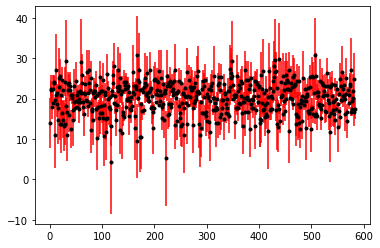

In [19]:
## Error plot

plt.errorbar(range(1,584), y_test, yerr = (y_test-predictions), fmt='.k', ecolor="red");



In [20]:
print ("Score:", model.score(X_test, y_test))

Score: 0.14734260954245426


The score is very low meaning the model doesnt fit we;ll